# Plot of model and data

This notebook plots the synthetic data produced by the simple model and the true model. Also it plots the projection of the initial appoximate.

In [1]:
import matplotlib as mpb
import numpy as np
import matplotlib.pyplot as plt
from fatiando.vis import mpl
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# show the figures in windows

# show all the matplotlib backends 
#mpb.rcsetup.all_backends 

# force matplotlib to use the 'Qt5Agg' backend 
#mpb.use(arg='Qt5Agg', force=True)

/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
import cPickle as pickle

# importing my functions
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

In [29]:
# importing the pickle file of results
resultpath = 'l2-tfa-inversion/multiple-54476/'

with open(resultpath+'inversion.pickle') as w:
        inversion = pickle.load(w)

# importing the true model
with open('model.pickle') as w:
        model = pickle.load(w)
        
with open('data.pickle') as w:
        data = pickle.load(w)

In [44]:
# directory to save the figure and filename
filename = '../../manuscript/figures/simple_model_data.png'

In [69]:
z0 = inversion['z0']
intensity = inversion['intensity']
z0_plot, int_plot = np.meshgrid(z0, intensity)
z0_plot = z0_plot.ravel()
int_plot = int_plot.ravel()
n = z0.size
m = intensity.size
N = inversion['x'].size
y = inversion['y']
x = inversion['x']
obs = inversion['observed_data']
initial = inversion['results'][9][2][0][0]
truevalues = [1,3]
x0 = 0.
y0 = 0.
rtp = data['rtp']

In [70]:
# building the matrix of the goal function
gamma_matrix = mfun.goal_matrix(n, m, inversion['results'])

# Data and model

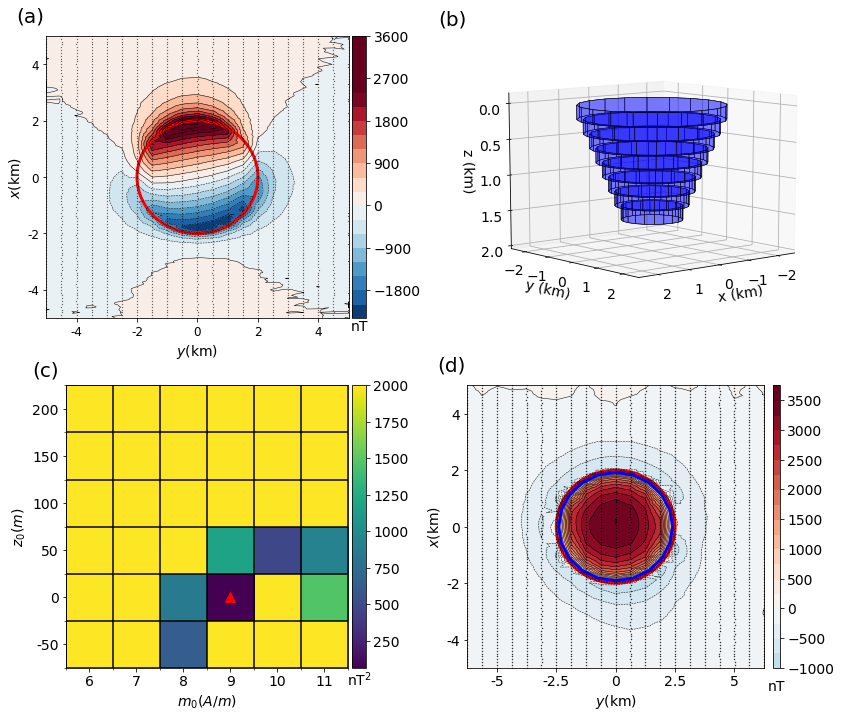

In [71]:
plt.figure(figsize=(12,10))

# sinthetic data
ax=plt.subplot(2,2,1)
circle1 = plt.Circle((y0, x0), 2000, color='r', linewidth=3., fill=False)
plt.tricontour(y, x, obs, 20, linewidths=0.5, colors='k')
plt.tricontourf(y, x, obs, 20,
                cmap='RdBu_r', vmin=np.min(obs),
                vmax=-np.min(obs)).ax.tick_params(labelsize=12)
plt.plot(y, x, 'ko', markersize=.25)
#mpl.polygon(initial, '.-r', xy2ne=True)
plt.xlabel('$y$(km)', fontsize=14)
plt.ylabel('$x$(km)', fontsize=14)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-295, fontsize=14)
mpl.m2km()
clb.ax.tick_params(labelsize=14)
ax.add_artist(circle1)
plt.text(np.min(y)-1000, np.max(x)+500, '(a)', fontsize=20)

verts_true = mfun.plot_prisms(model['prisms'], scale=0.001)

# true model
ax = plt.subplot(2,2,2, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-2.5, 2.5, 100)
ax.set_ylim(-2.5, 2.5, 100)
ax.set_zlim(2, -0.1, 100)
ax.tick_params(labelsize=14)
ax.set_ylabel('y (km)', fontsize= 14)
ax.set_xlabel('x (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(10, 50)
ax.text2D(-0.11, 0.097, '(b)', fontsize=20)

ax2 = plt.subplot(2,2,3)
w = 3
img = ax2.imshow(gamma_matrix, vmin=np.min(gamma_matrix),
                vmax=2000, origin='lower',extent=[0,w,0,w])
clb = plt.colorbar(img, pad=0.012, shrink=1)
clb.ax.set_title('nT$^2$', pad=-300, fontsize=14)
clb.ax.tick_params(labelsize=14)
img.axes.tick_params(labelsize=14)
plt.ylabel('$z_0 (m)$', fontsize=14)
plt.xlabel('$m_0 (A/m)$', fontsize=14)
ax2.text(-0.35, 3.1, '(c)', fontsize=20)
plt.plot((2.*truevalues[1]+1.)*w/(2.*m), (2.*truevalues[0]+1.)*w/(2.*n), '^r', markersize=10)
#plt.plot((2.*solution[1]+1.)*w/(2.*m), (2.*solution[0]+1.)*w/(2.*n), 'Dw', markersize=3)
x_label_list = []
y_label_list = []
for xl, yl in zip(intensity,z0):
    x_label_list.append(str(xl)[:-2])
    y_label_list.append(str(yl)[:-2])
ax2.set_xticks(np.linspace(w/(2.*n), w - w/(2.*n), n))
ax2.set_yticks(np.linspace(w/(2.*m), w - w/(2.*m), m))
ax2.set_xticklabels(x_label_list)
ax2.set_yticklabels(y_label_list)
# Minor ticks
ax2.set_xticks(np.linspace(0, w, n+1), minor=True)
ax2.set_yticks(np.linspace(0, w, m+1), minor=True)
ax2.grid(which='minor', color='k', linewidth=1.5)

ax3 = plt.subplot(224)
#plt.title('Predicted RTP', fontsize=20)
plt.tricontour(y, x, rtp, 20, linewidths=0.5, colors='k')
circle1 = plt.Circle((y0, x0), 2000, color='r', linewidth=3., fill=False)
plt.tricontourf(y, x, rtp, 20, cmap='RdBu_r',
               vmin=-np.max(rtp), vmax=np.max(rtp)).ax.tick_params(labelsize=14)
plt.plot(y, x, '.k', markersize=.8)
plt.xlabel('$y$(km)', fontsize=14)
plt.ylabel('$x$(km)', fontsize=14)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=14)
clb.ax.set_title('nT', pad=-305, fontsize=14)
ax3.add_artist(circle1)
mpl.polygon(model['prisms'][0], '-b', linewidth=3., xy2ne=True)
plt.text(np.min(y)-1000, np.max(x)+500, '(d)', fontsize=20)
mpl.m2km()

plt.tight_layout()

plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

Simple model simulation. (a) noise-corrupted total-field anomaly produced by the simple model (blue prisms) in (b) with a pseudoramdom Gaussian distribution having mean $\mu_0 = 0$ nT and standard deviation $\sigma_0 = 5$ nT, the black dots represent the observation points. The connected red dots are the vertices of the initial approximate horizontally projected at the data map. (b) perspective view of the simple model represented by the blue prisms.